In [871]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing  import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [872]:
df = pd.read_csv("credit_risk.csv", index_col="Id")

In [873]:
df

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
Id,,,,,,,,,,,
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28


In [874]:
df.iloc[:,7].unique()

array([1, 0], dtype=int64)

In [875]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32581 entries, 0 to 32780
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32581 non-null  int64  
 1   Income          32581 non-null  int64  
 2   Home            32581 non-null  object 
 3   Emp_length      31686 non-null  float64
 4   Intent          32581 non-null  object 
 5   Amount          32581 non-null  int64  
 6   Rate            29465 non-null  float64
 7   Status          32581 non-null  int64  
 8   Percent_income  32581 non-null  float64
 9   Default         32581 non-null  object 
 10  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.0+ MB


In [876]:
df.isna().sum()

Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [877]:
# dealing with missing values 
SI = SimpleImputer()

df.iloc[:,[3,6]]= SI.fit_transform(df.iloc[:,[3,6]])

In [878]:
df.isna().sum()

Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

In [879]:
# Perform one-hot encoding
df1 = pd.get_dummies(df, columns=['Home',"Intent","Default"])

In [880]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32581 entries, 0 to 32780
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       32581 non-null  int64  
 1   Income                    32581 non-null  int64  
 2   Emp_length                32581 non-null  float64
 3   Amount                    32581 non-null  int64  
 4   Rate                      32581 non-null  float64
 5   Status                    32581 non-null  int64  
 6   Percent_income            32581 non-null  float64
 7   Cred_length               32581 non-null  int64  
 8   Home_MORTGAGE             32581 non-null  uint8  
 9   Home_OTHER                32581 non-null  uint8  
 10  Home_OWN                  32581 non-null  uint8  
 11  Home_RENT                 32581 non-null  uint8  
 12  Intent_DEBTCONSOLIDATION  32581 non-null  uint8  
 13  Intent_EDUCATION          32581 non-null  uint8  
 14  Intent

In [881]:
# dropped one category for each feature 
df1 = df1.drop(["Home_OTHER","Intent_VENTURE", "Default_Y"], axis=1)

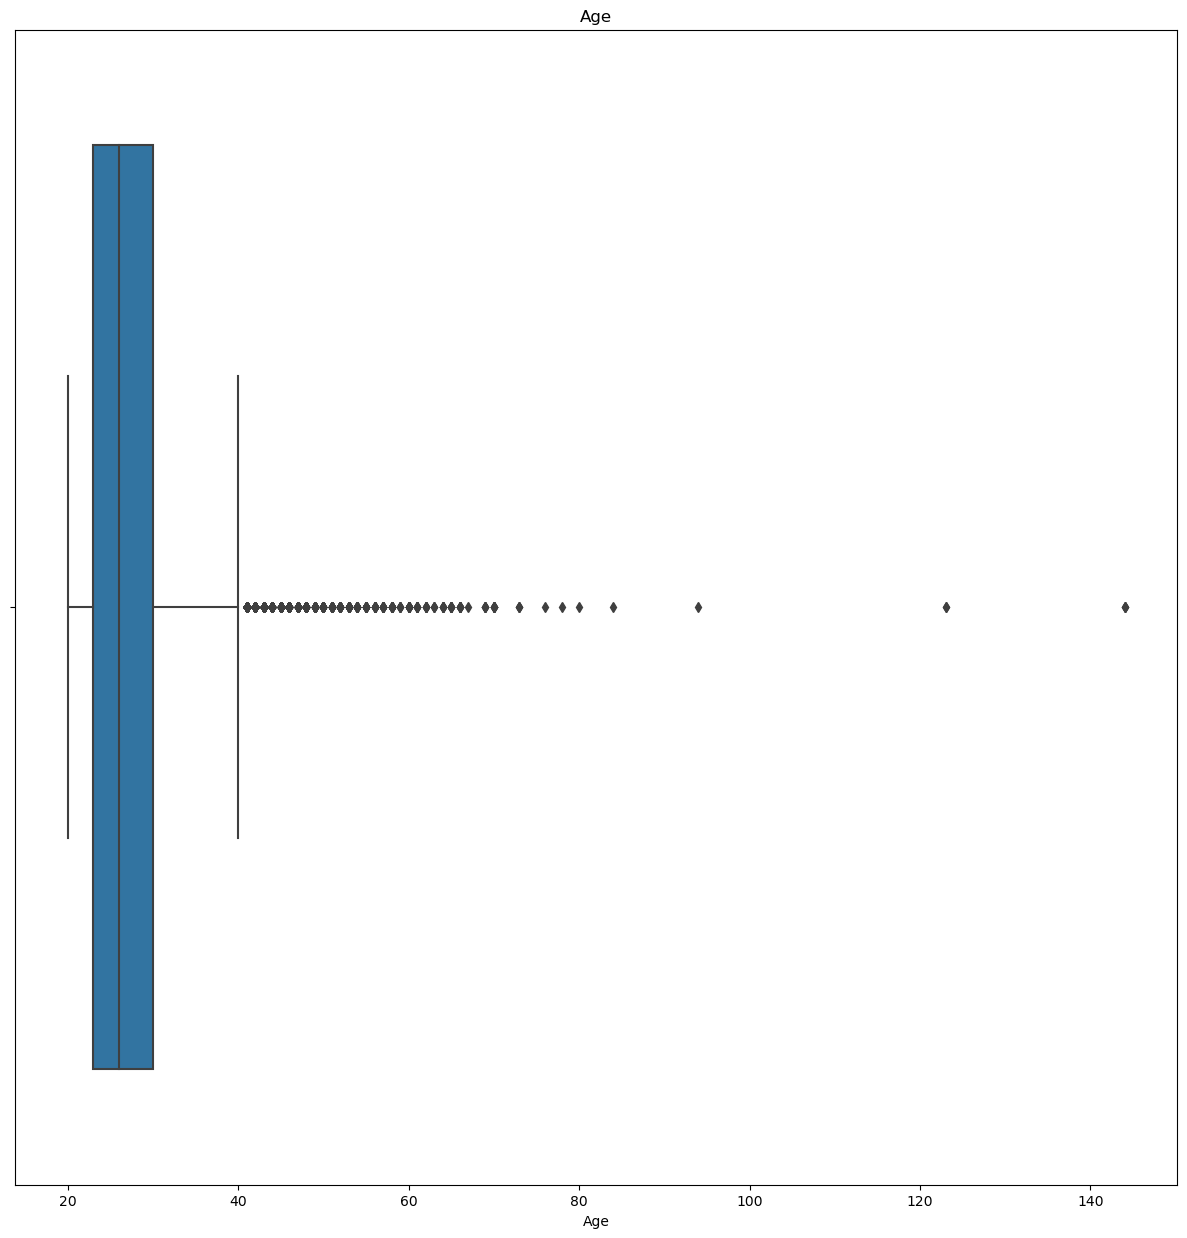

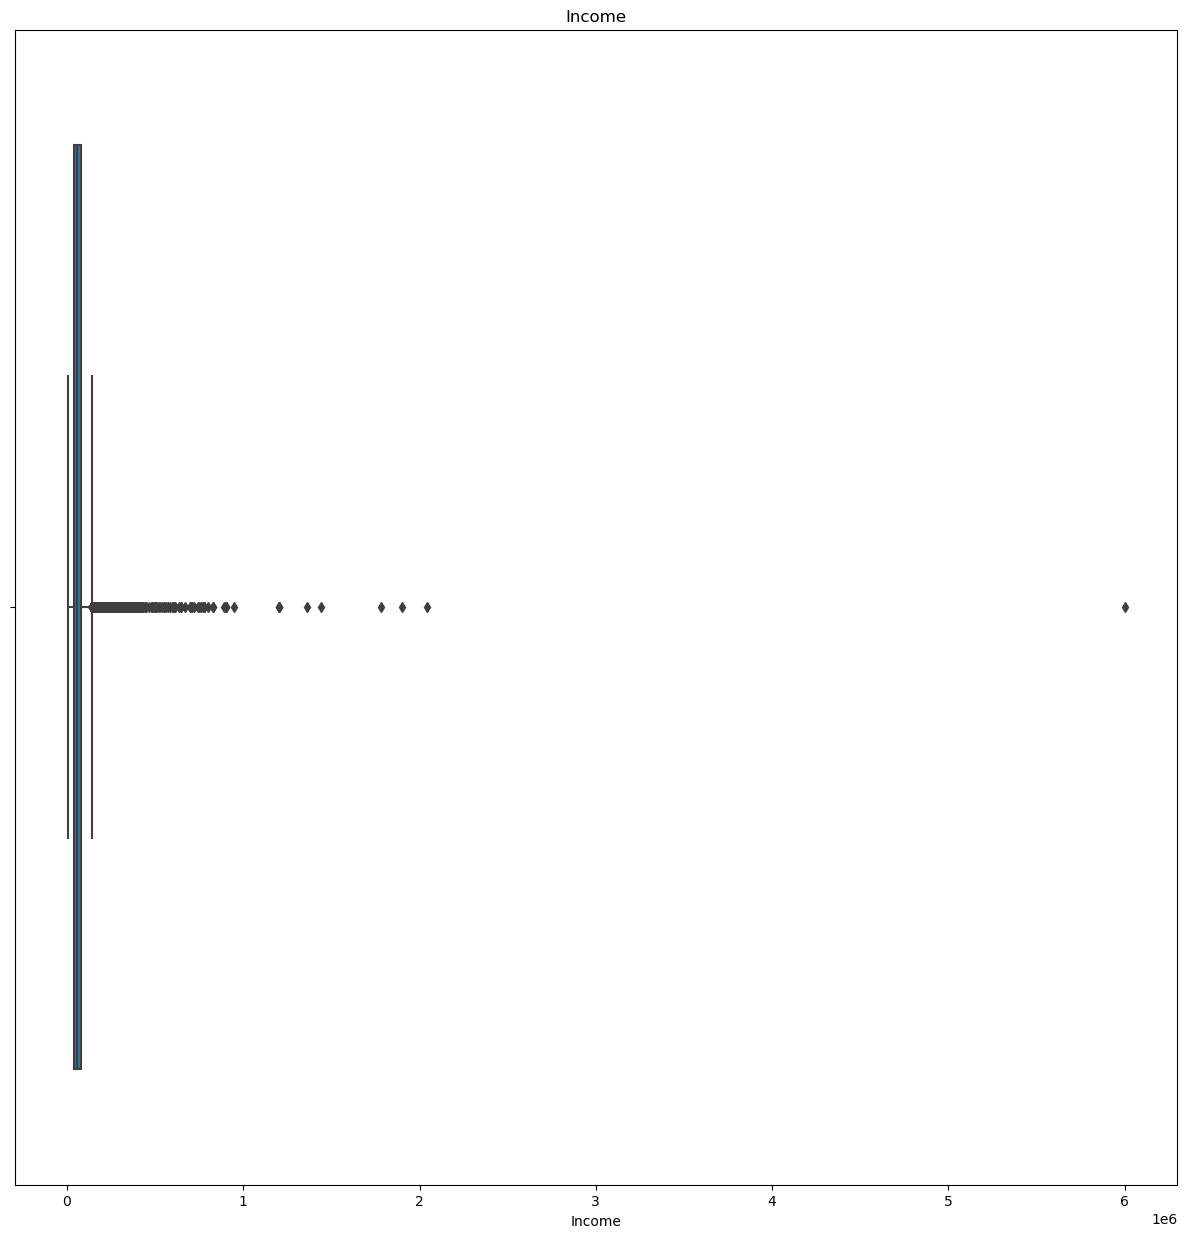

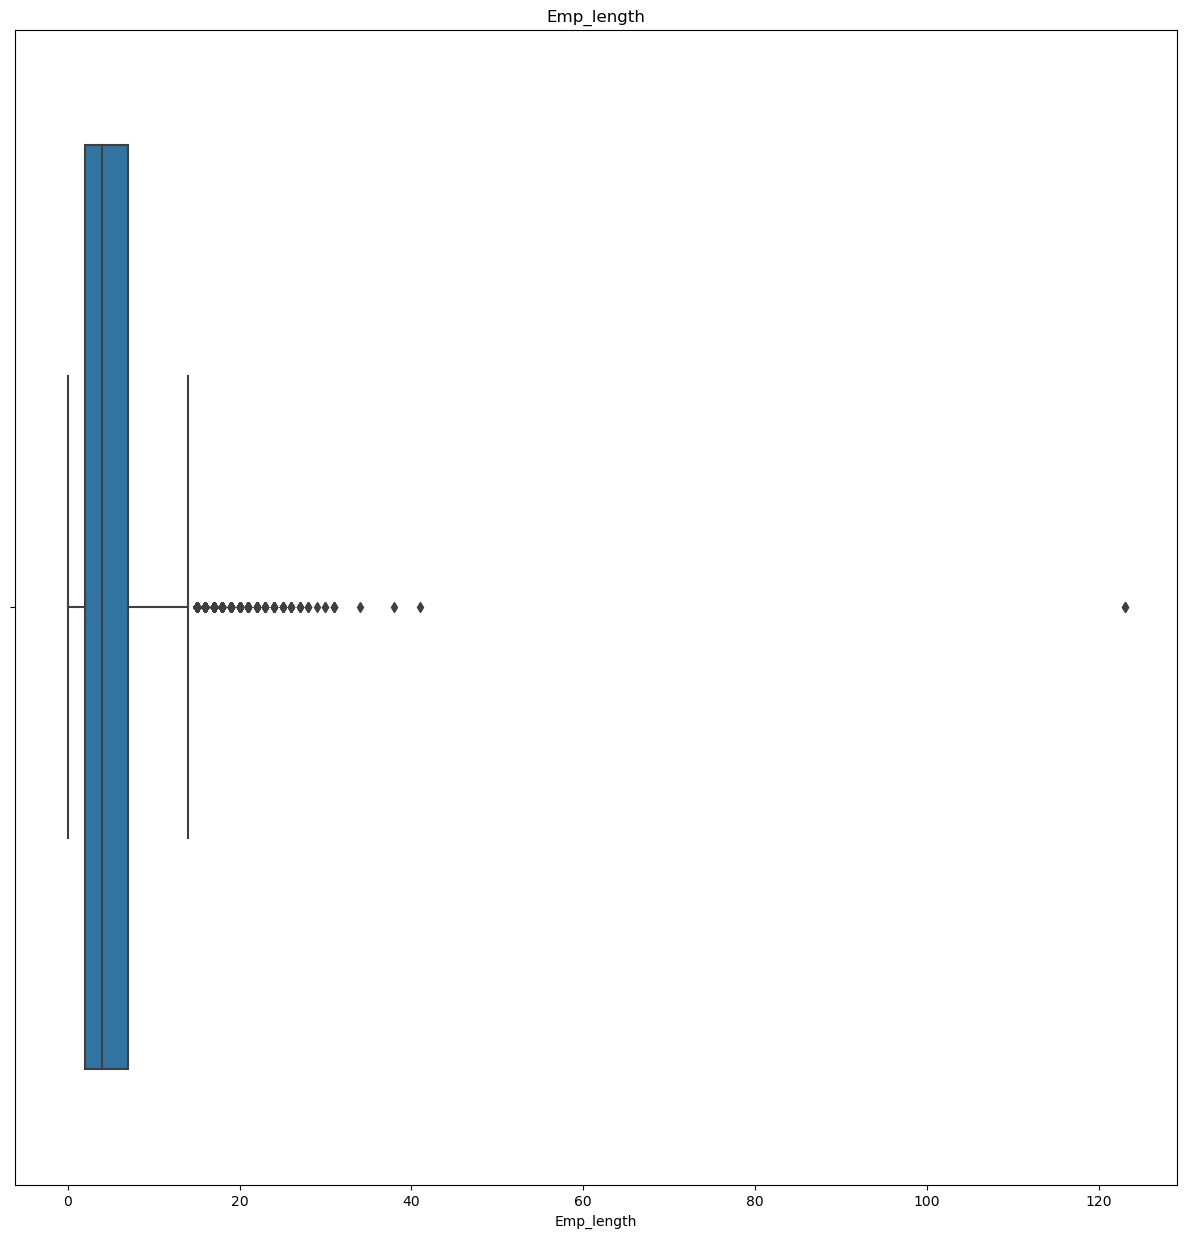

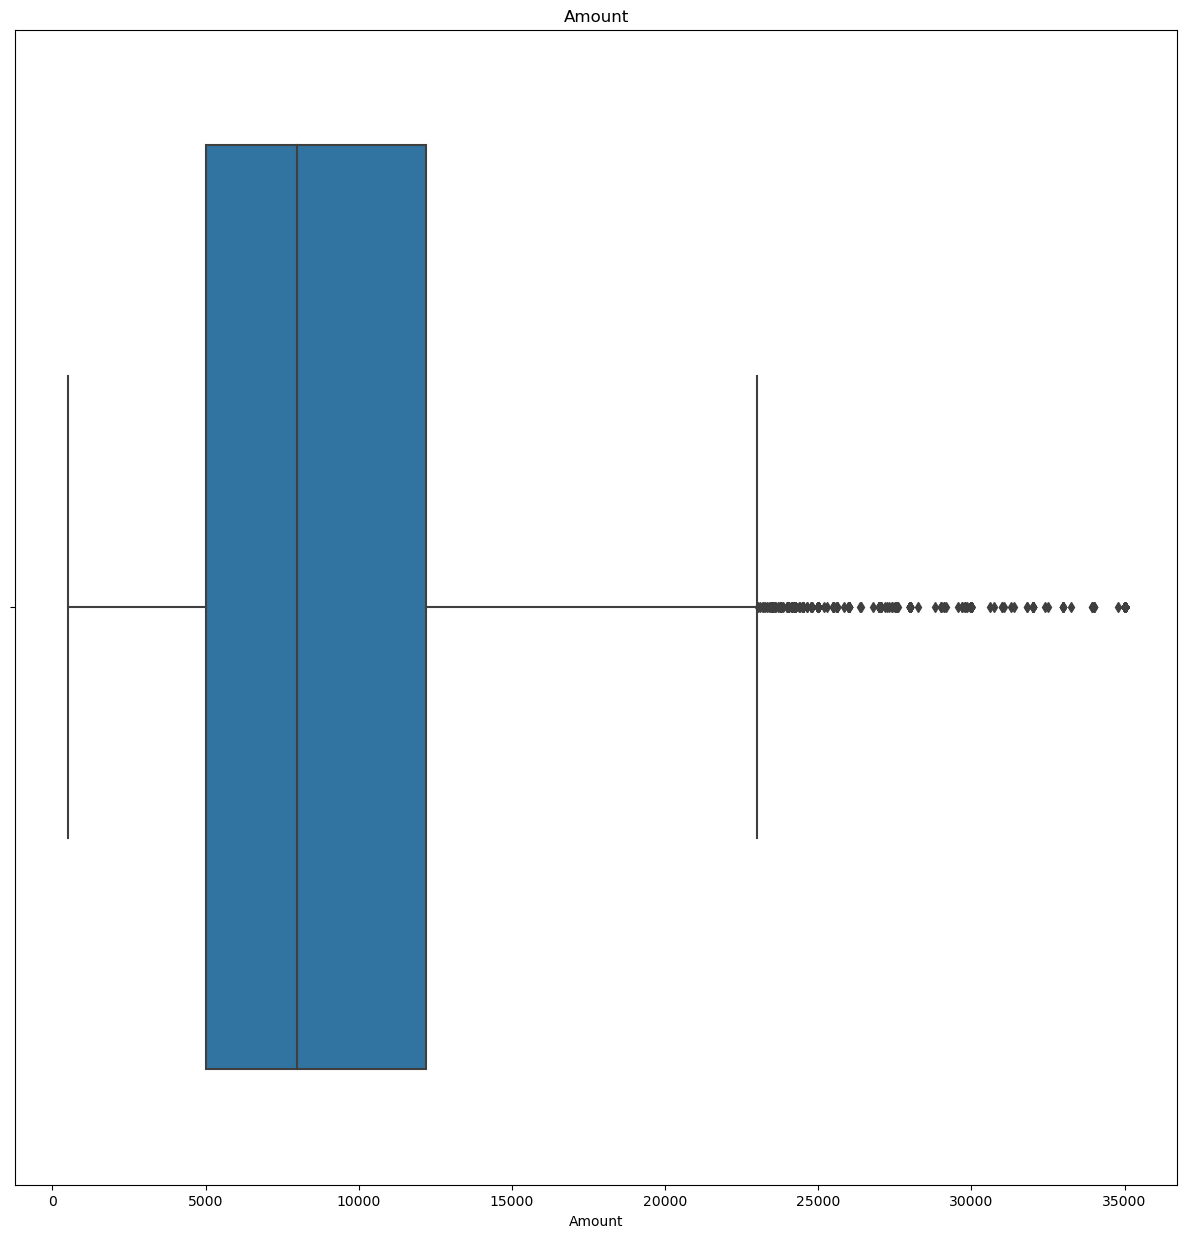

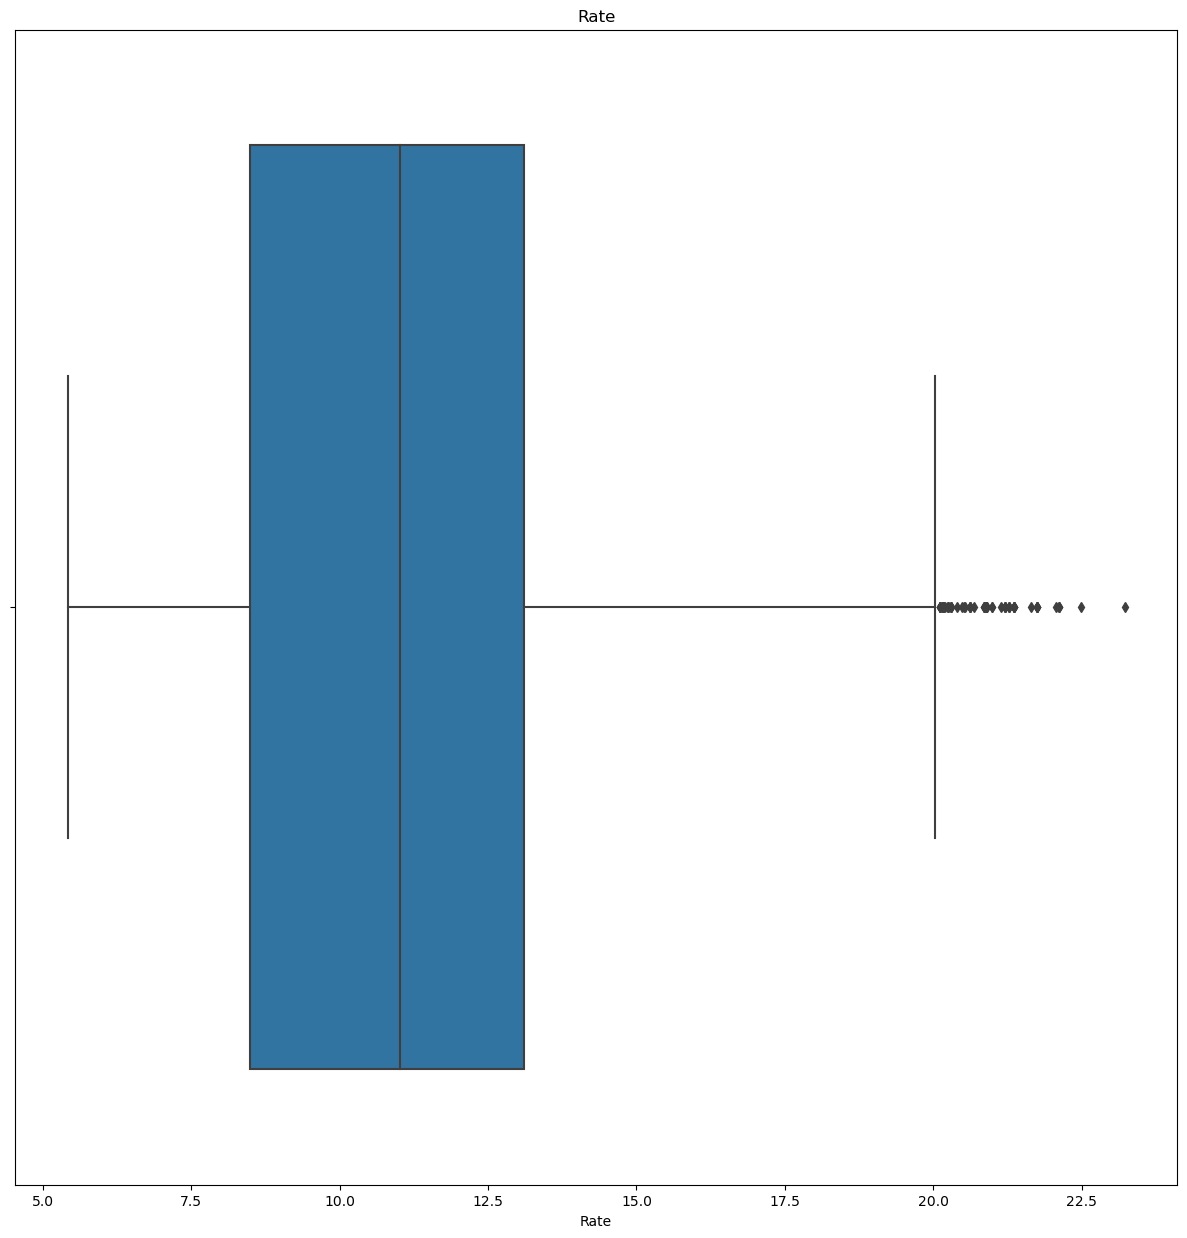

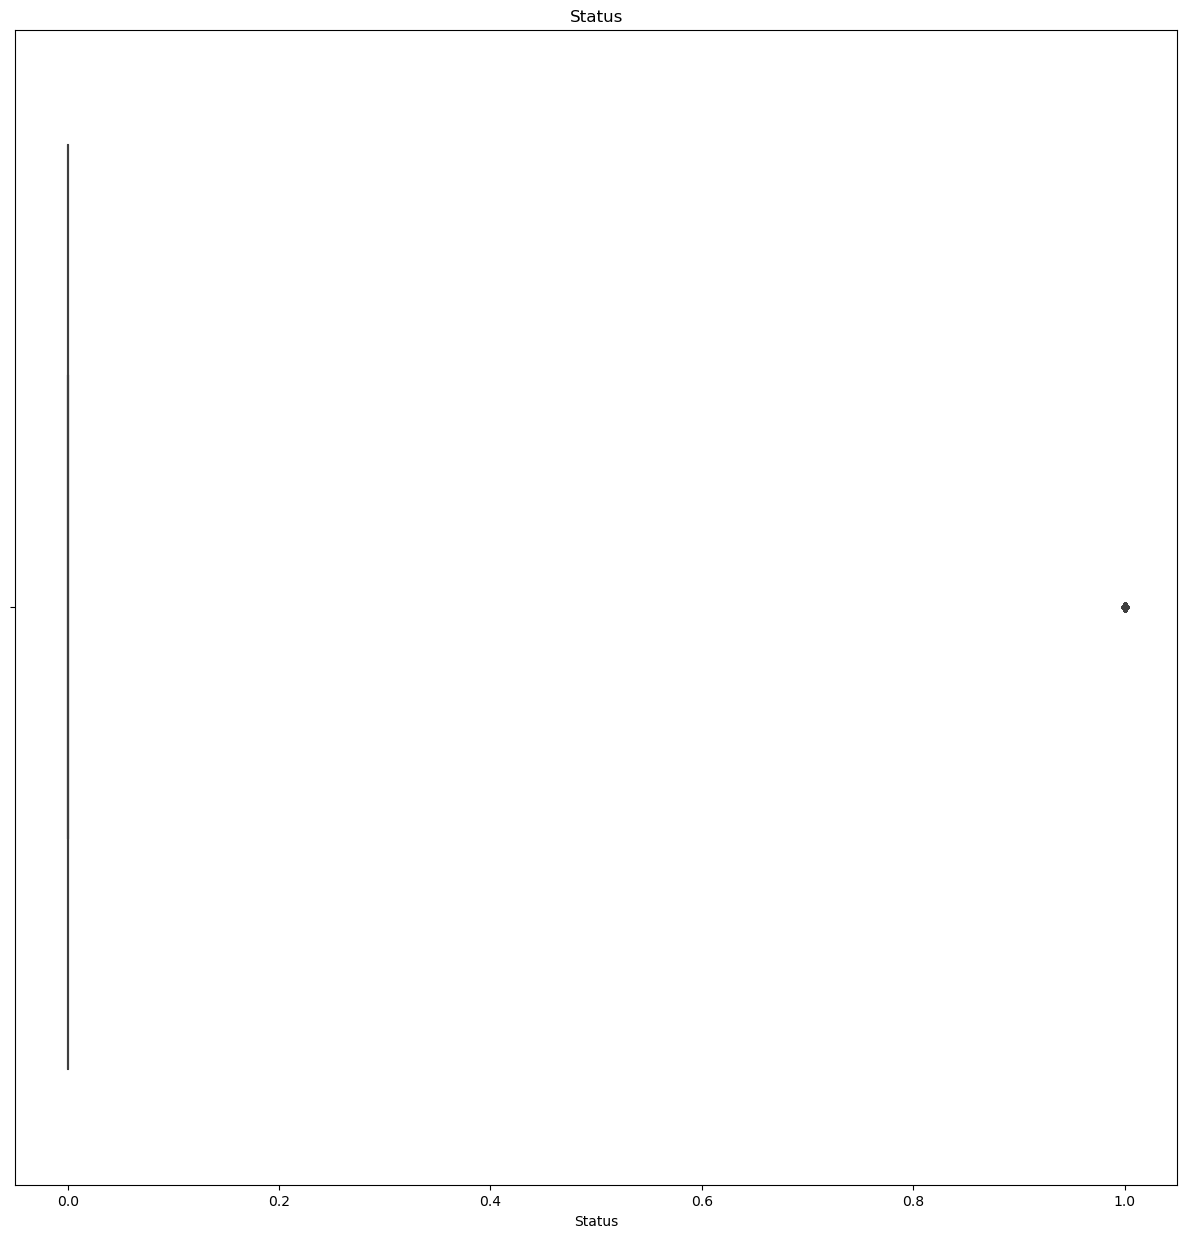

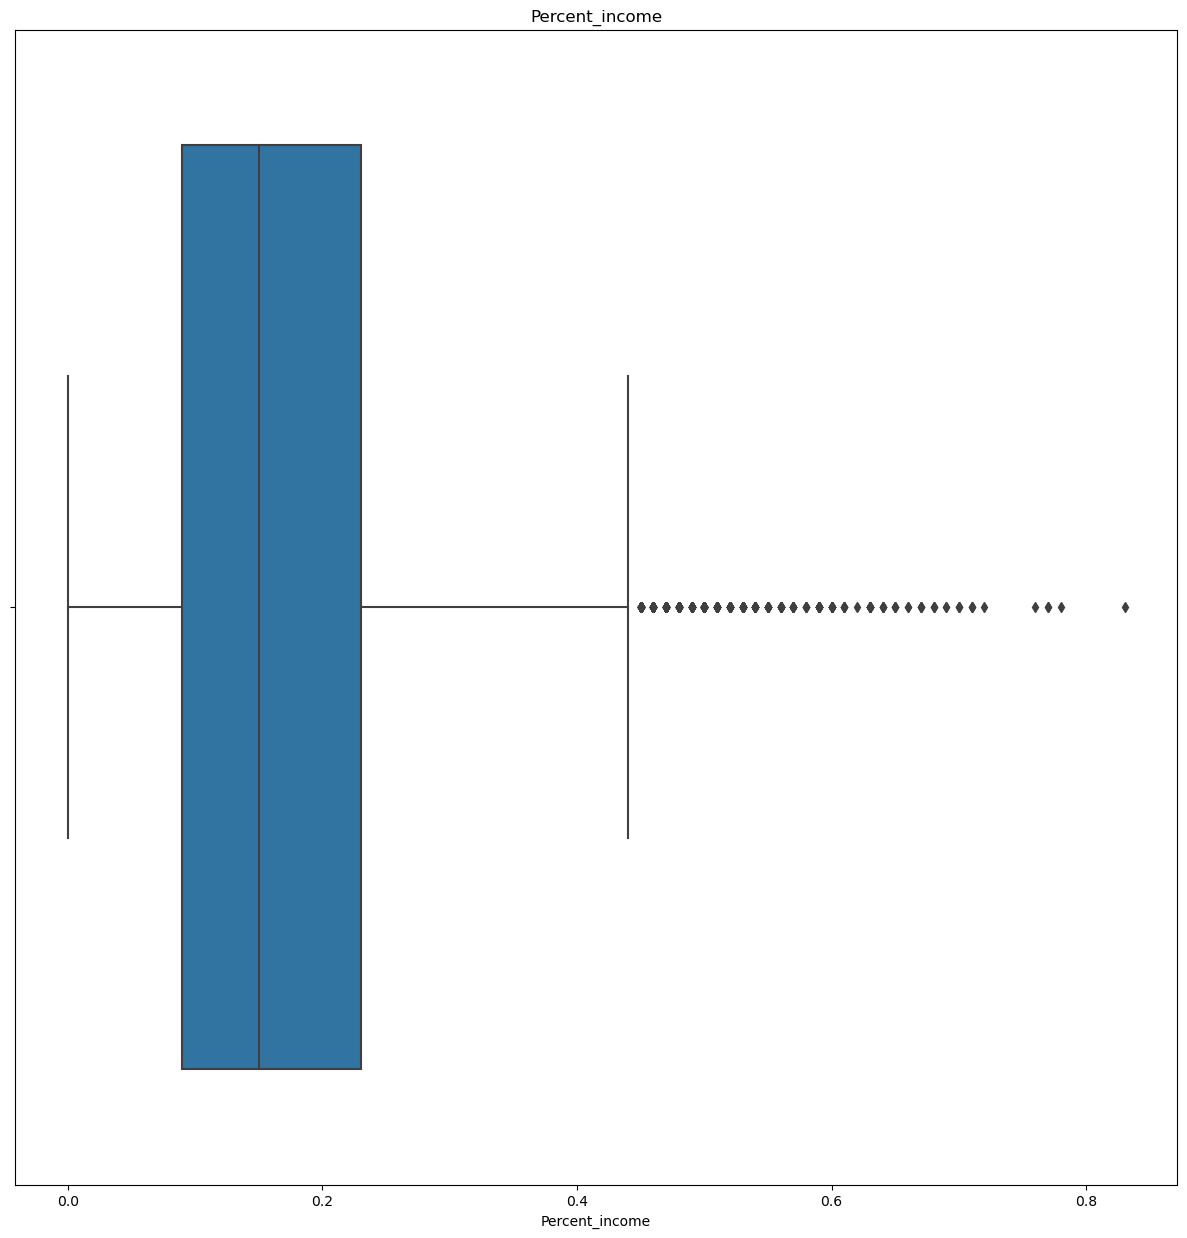

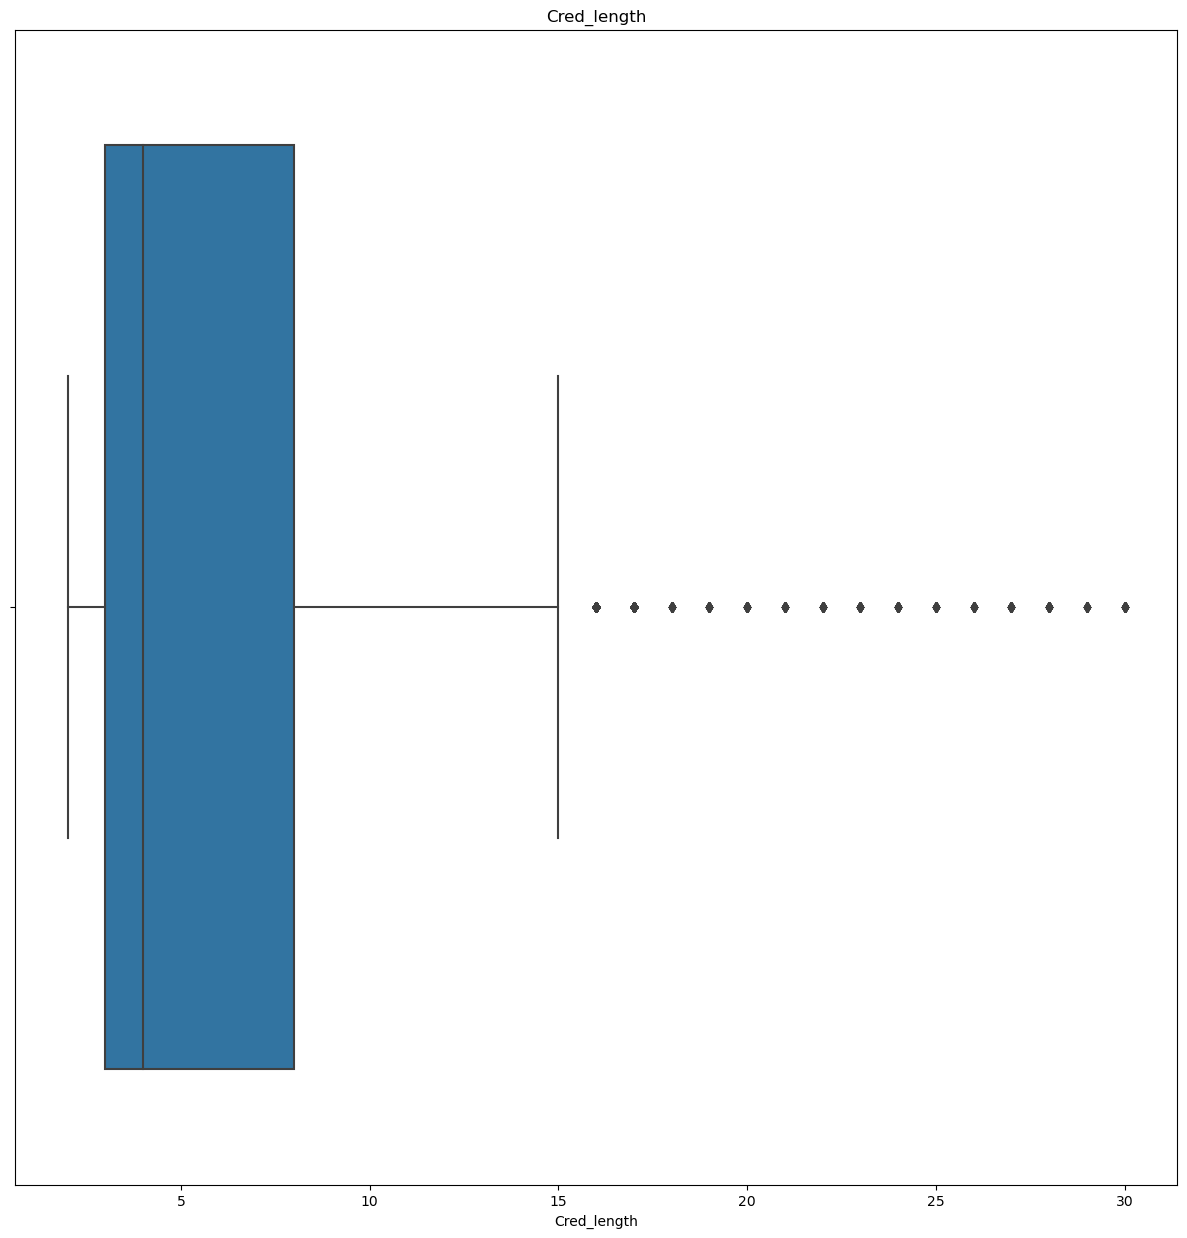

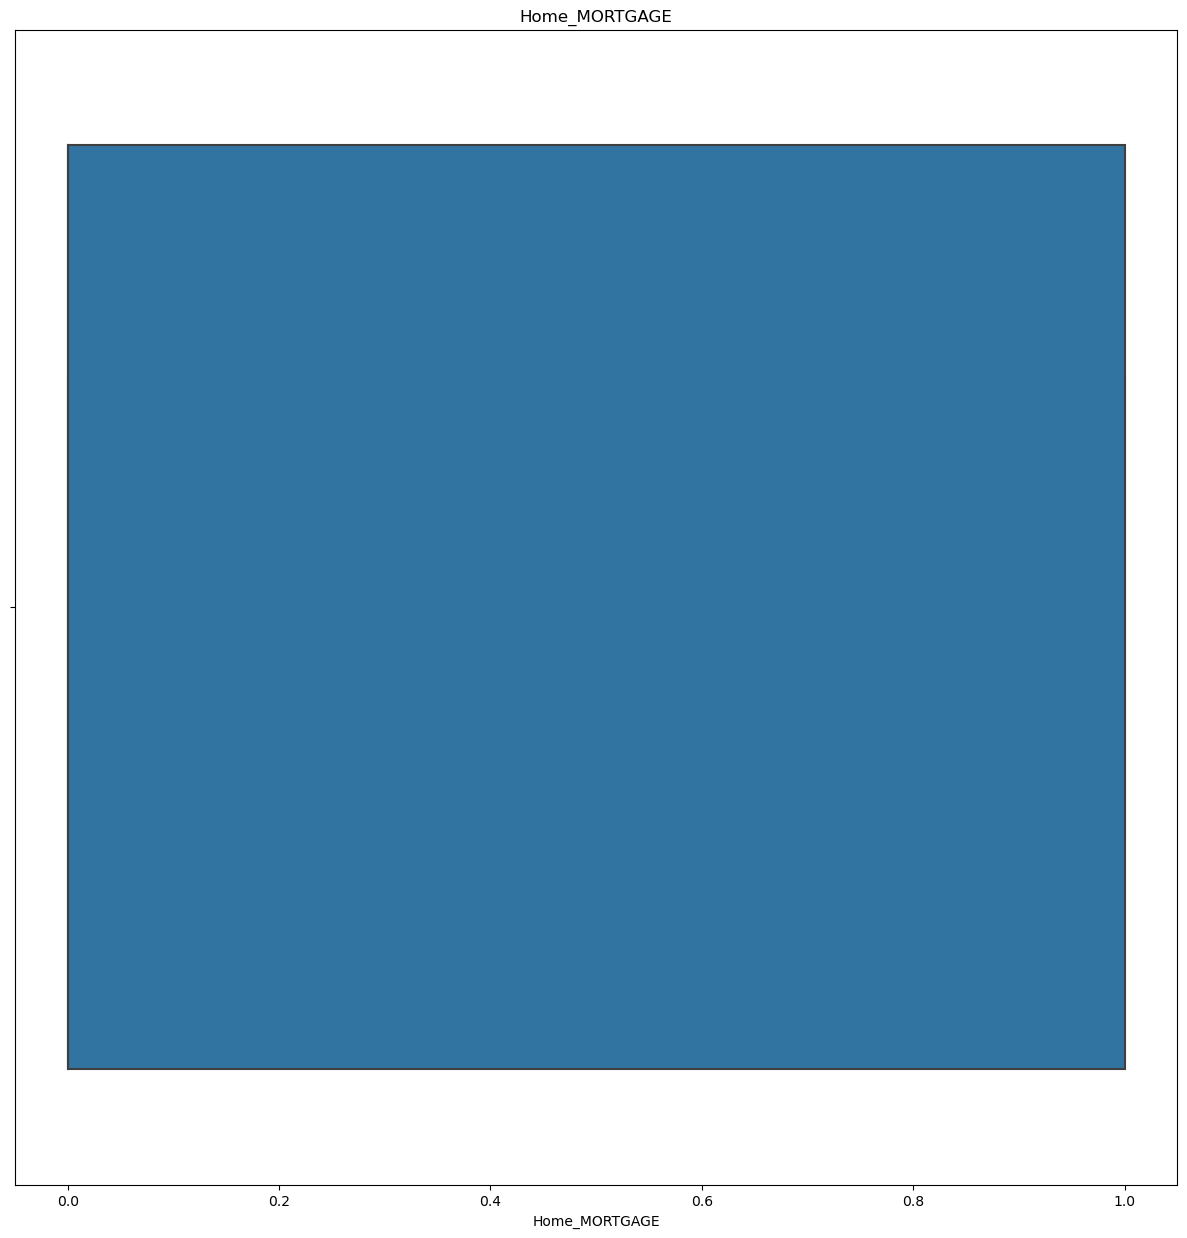

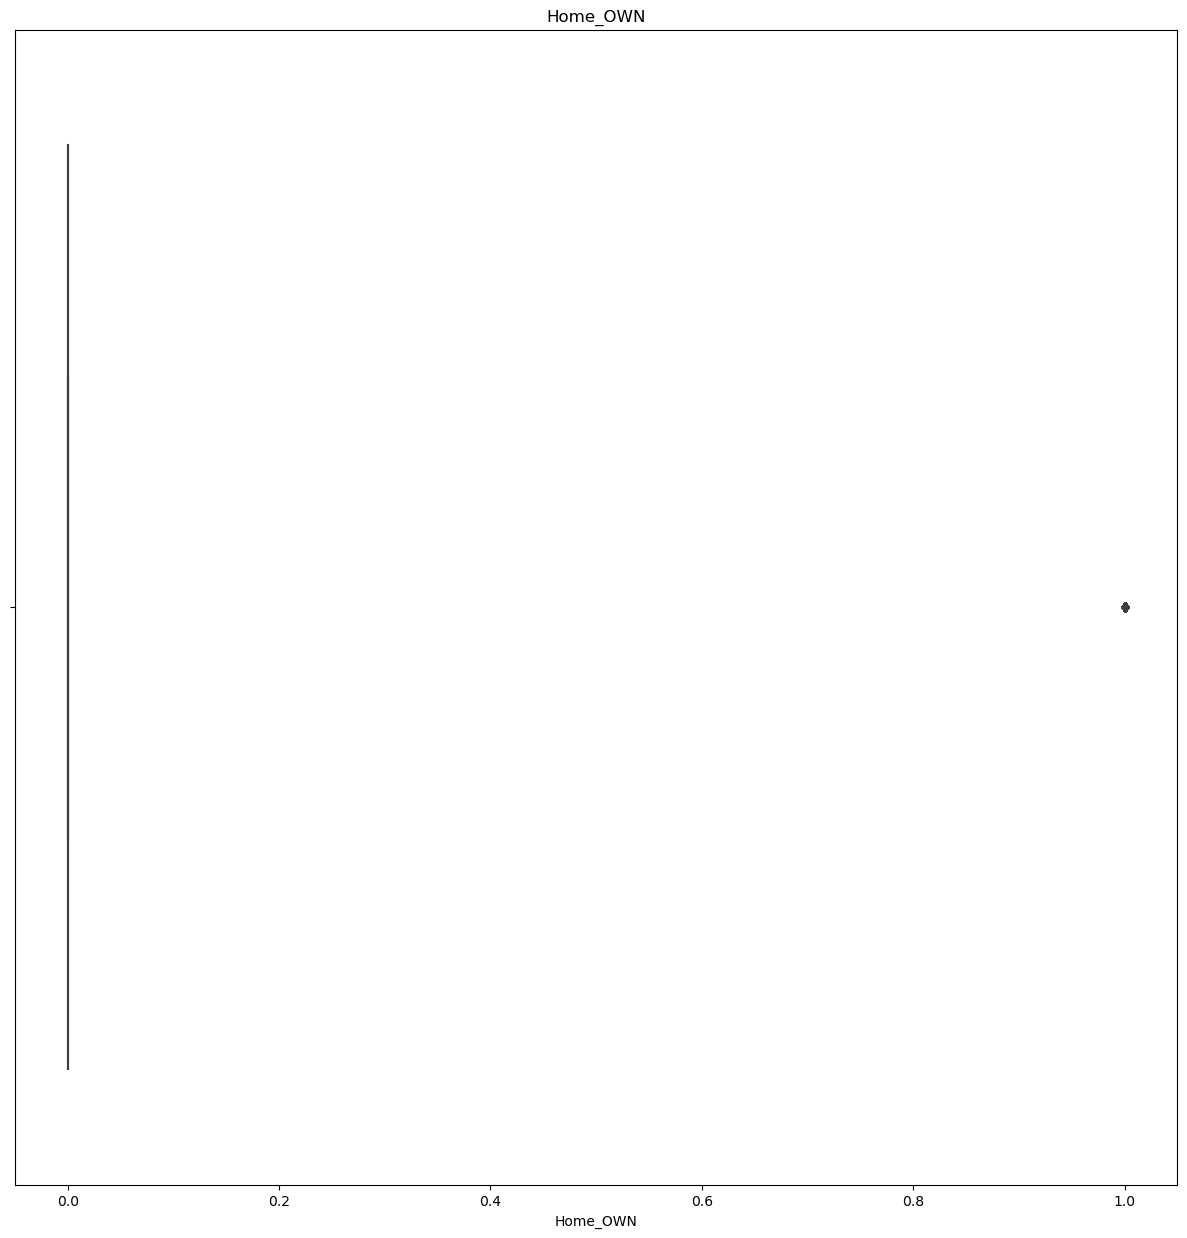

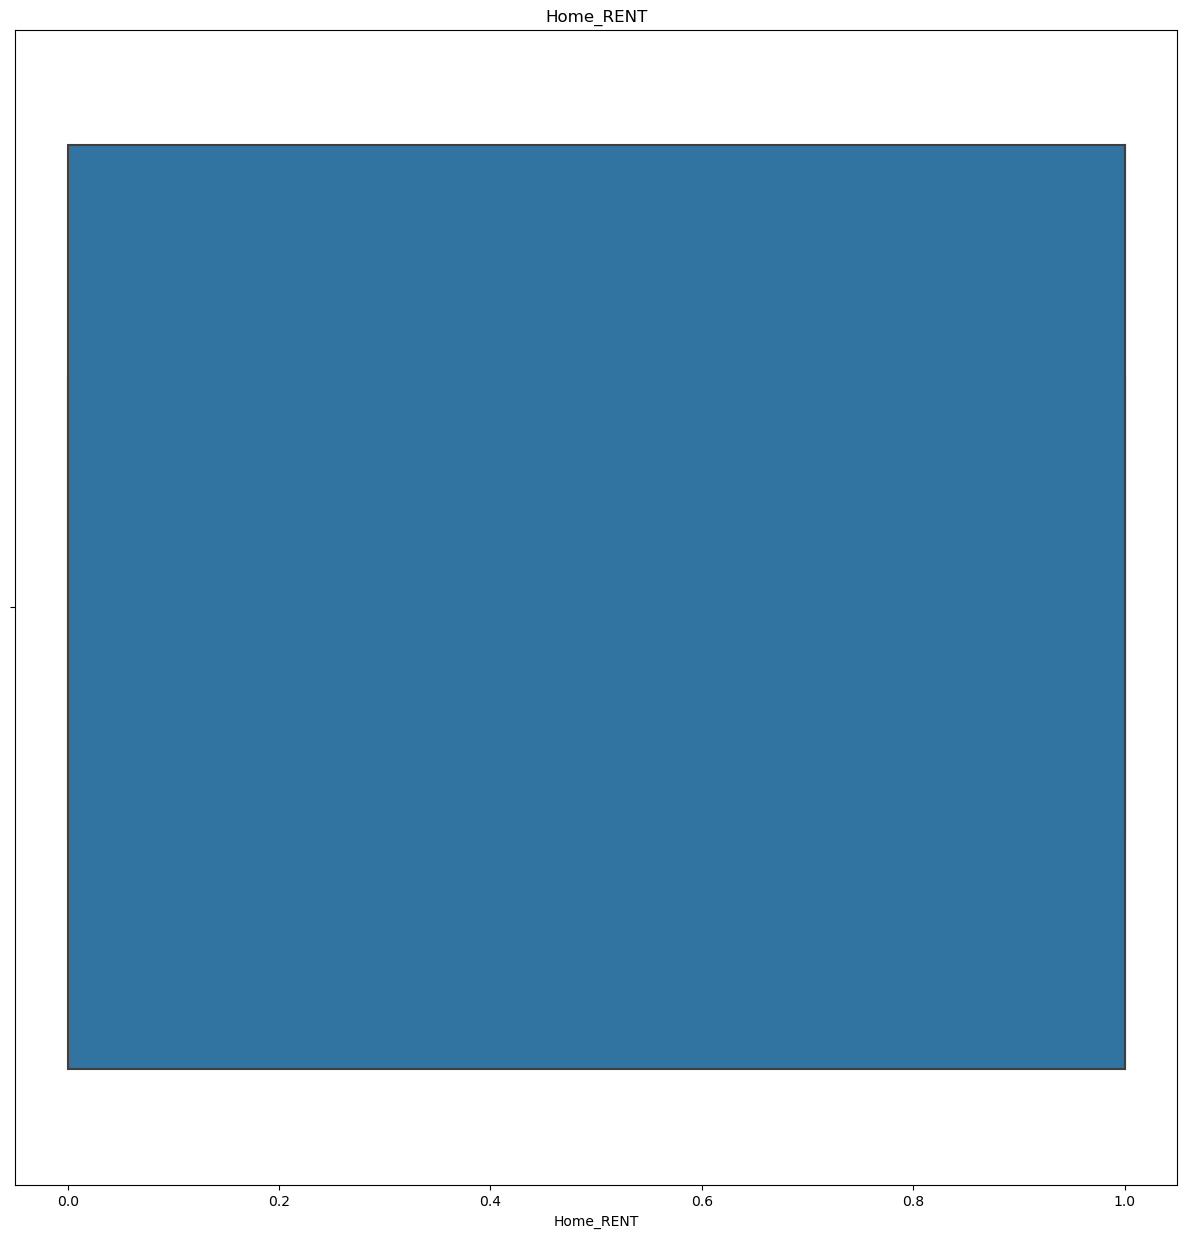

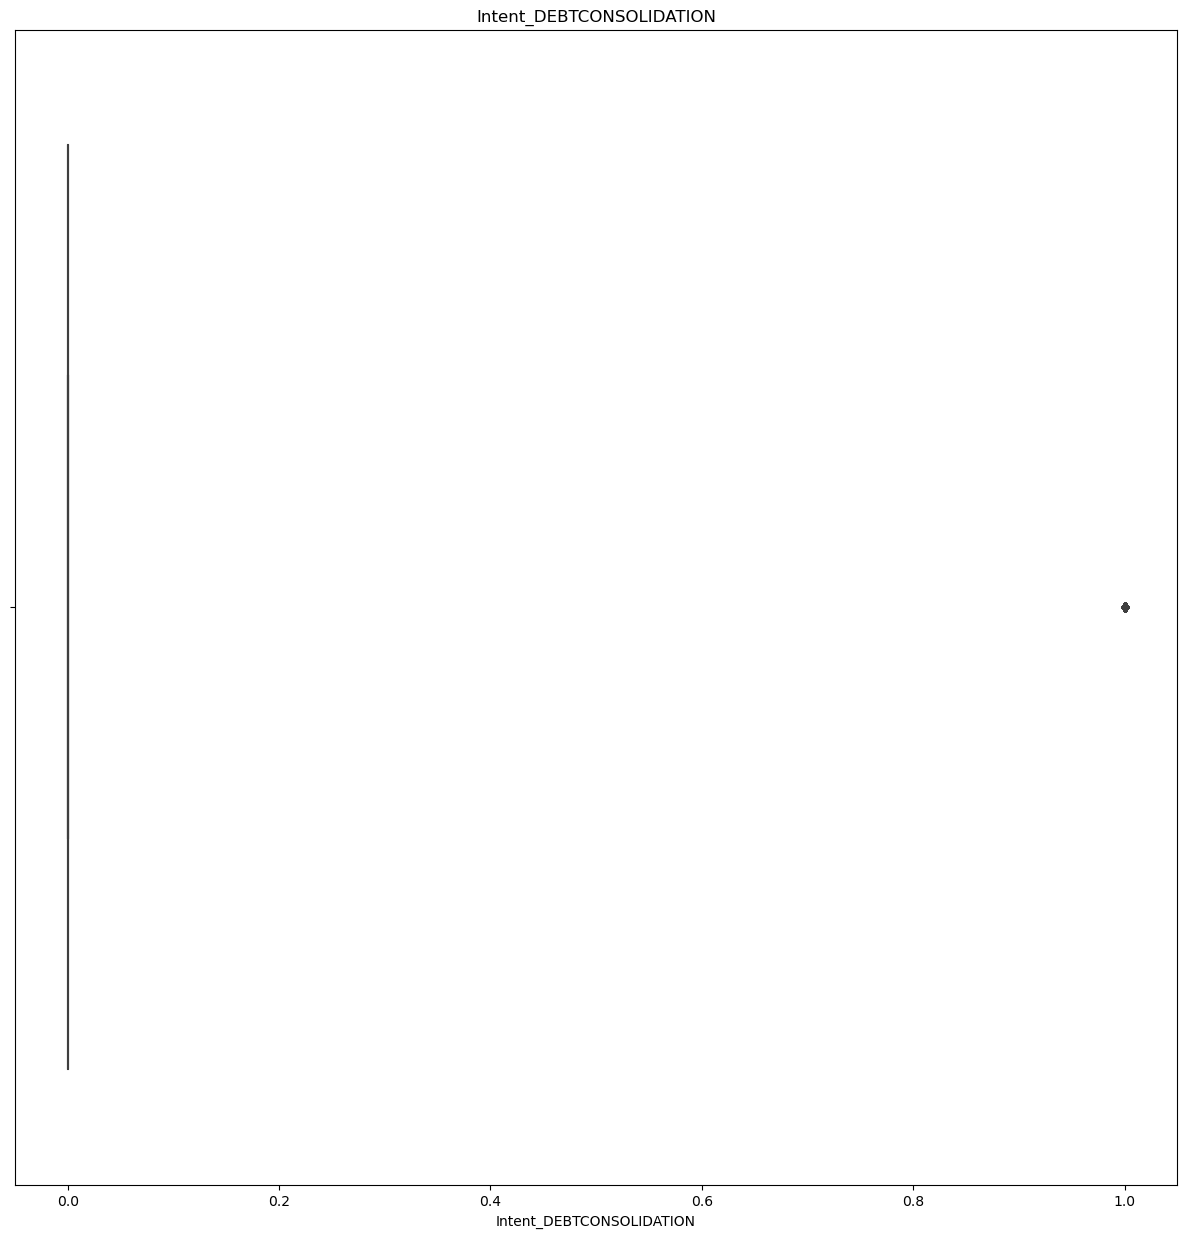

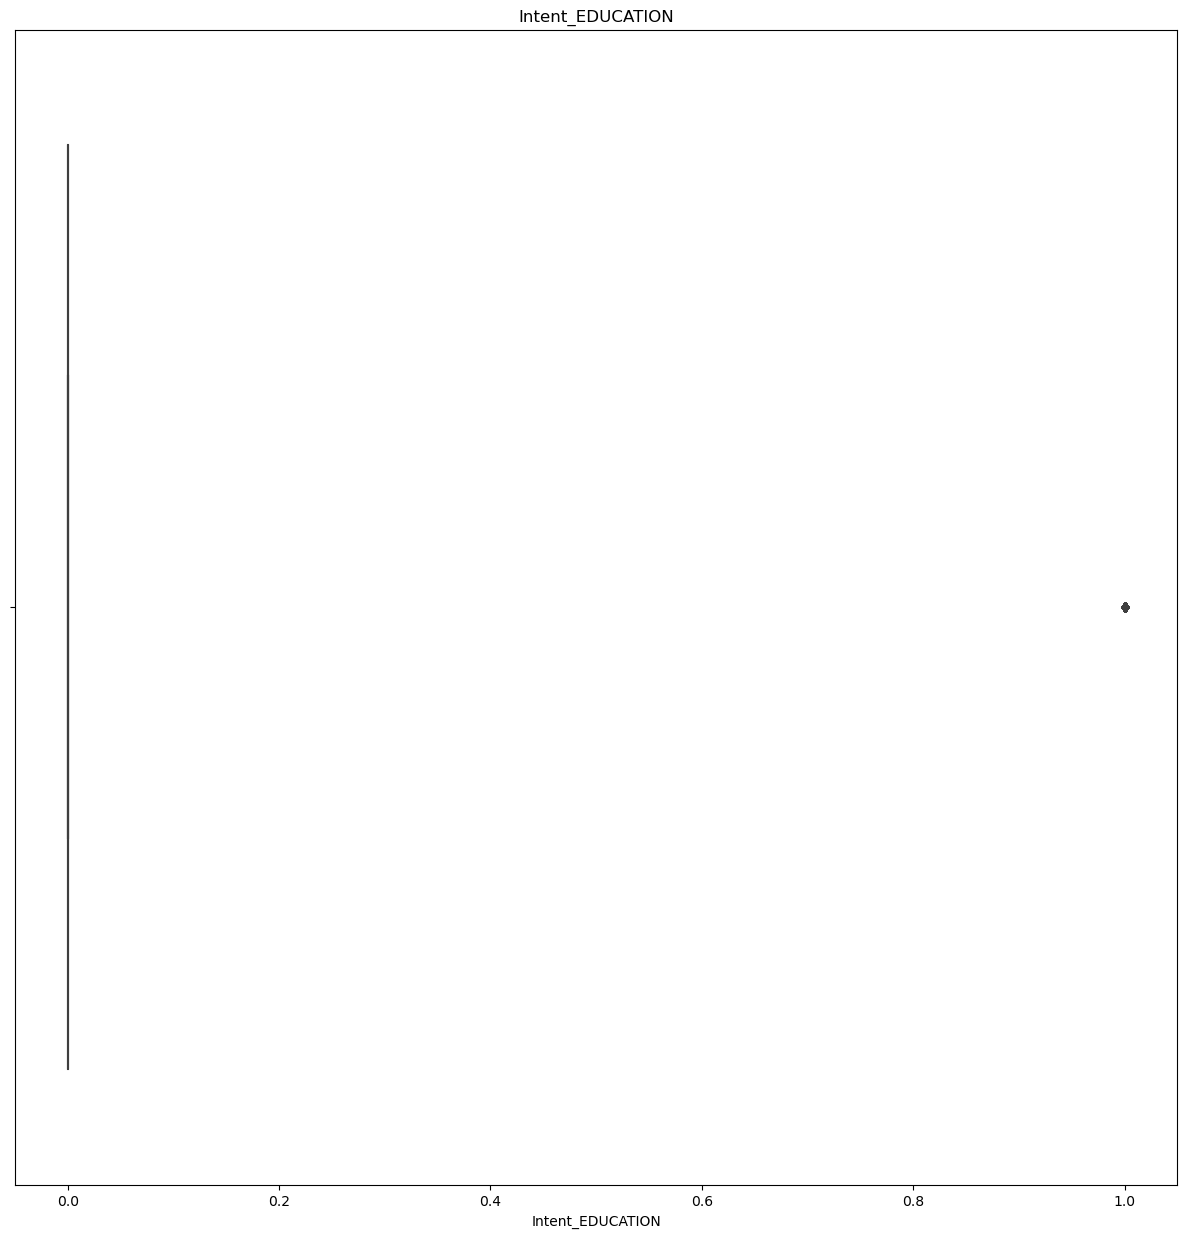

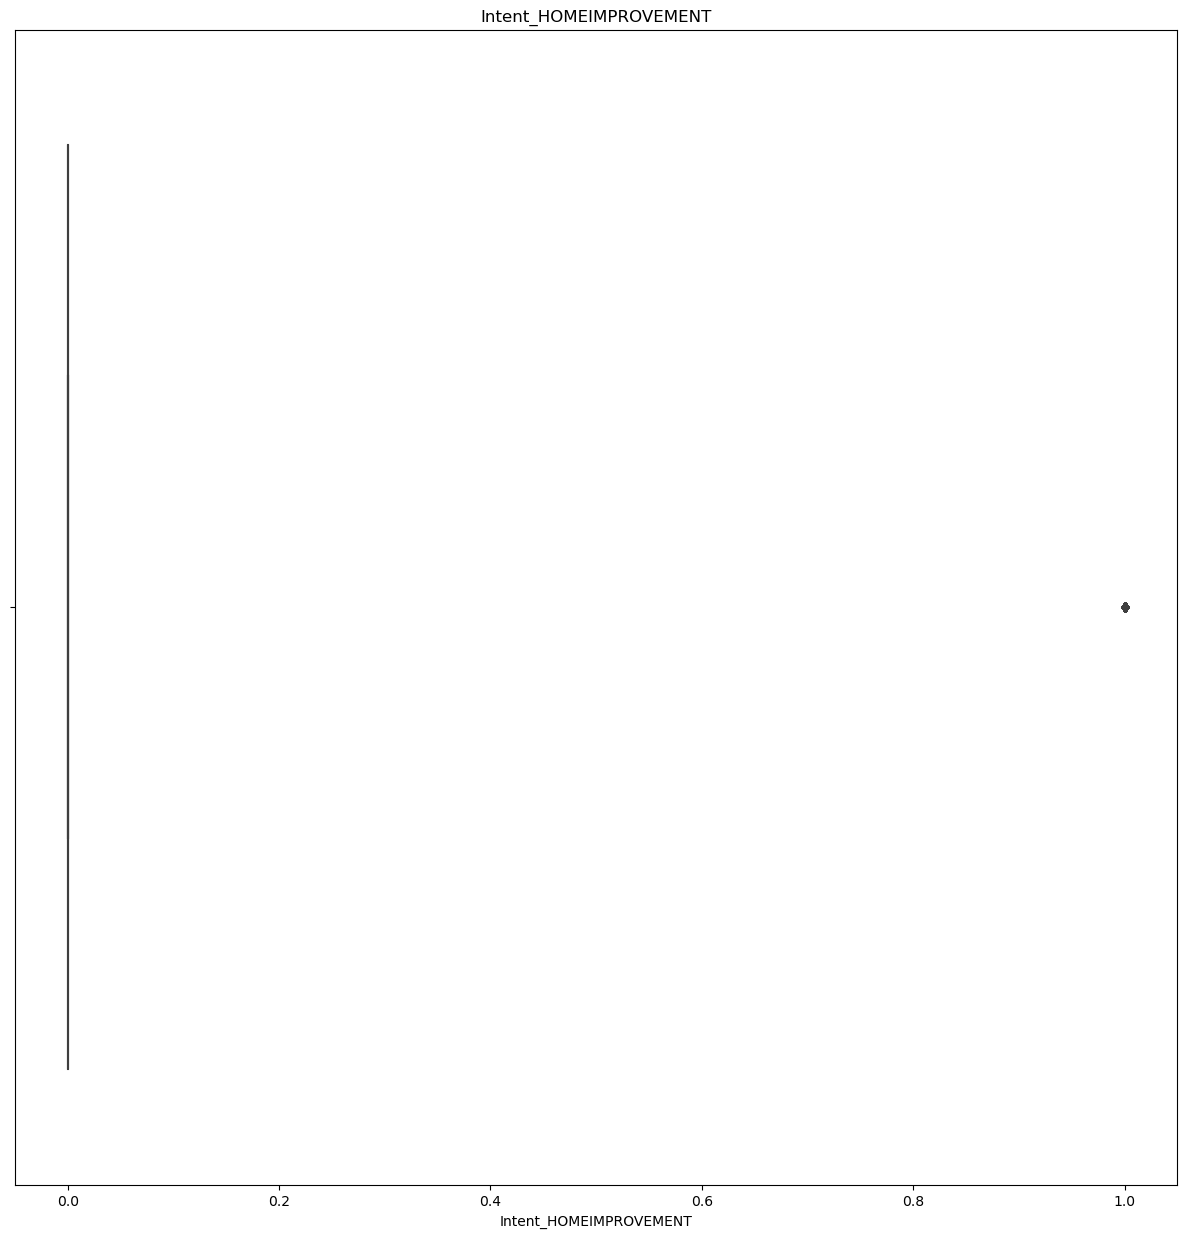

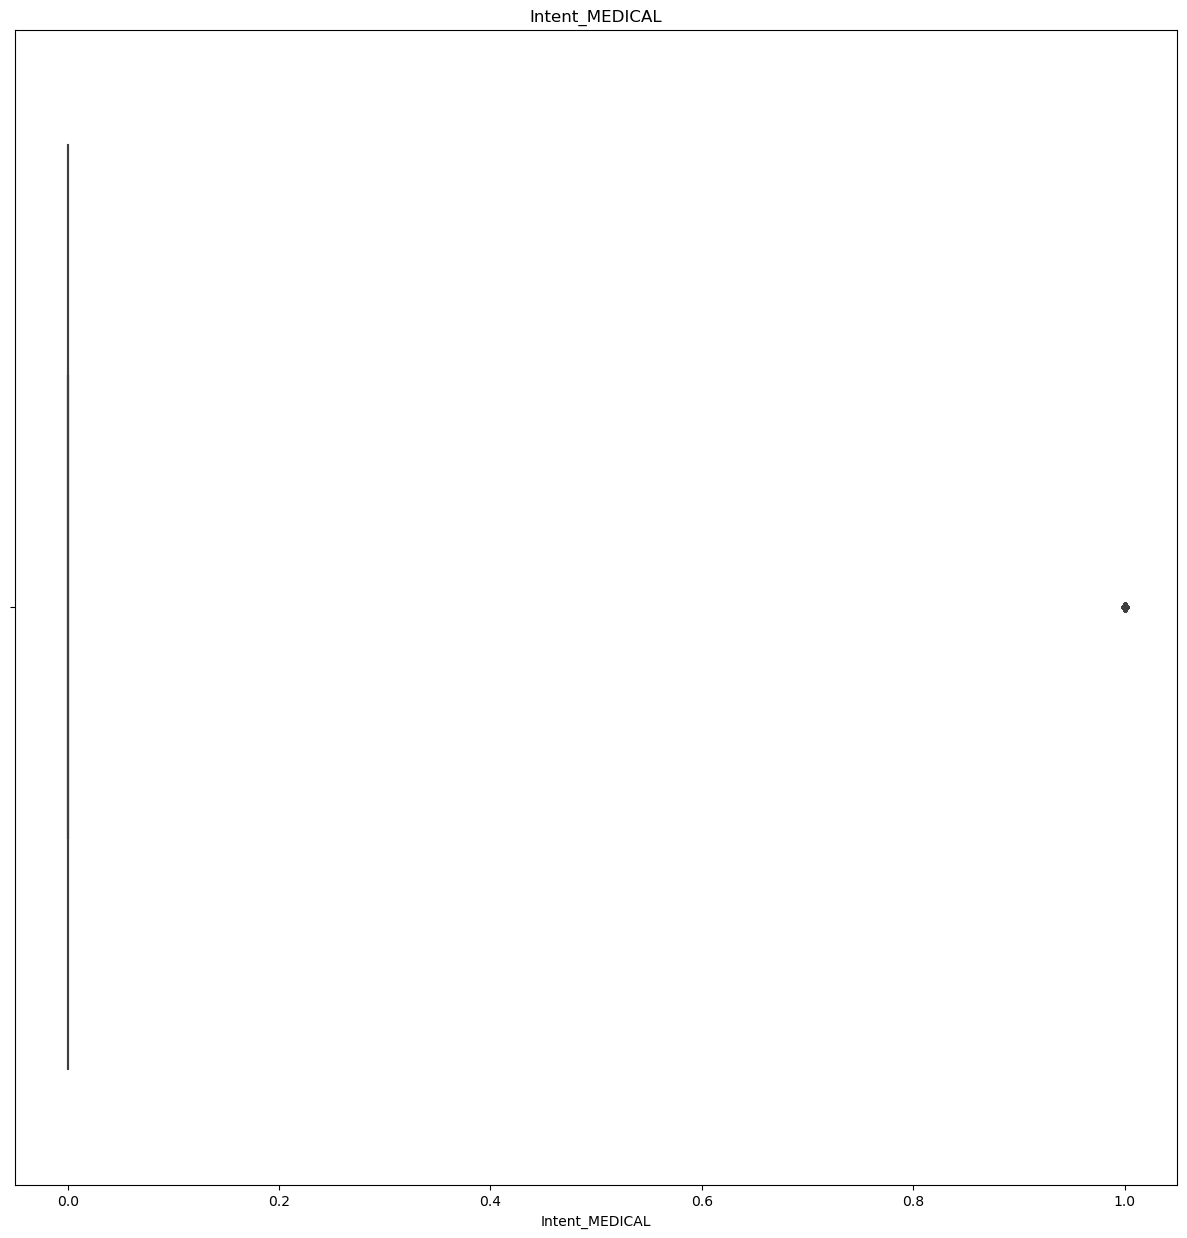

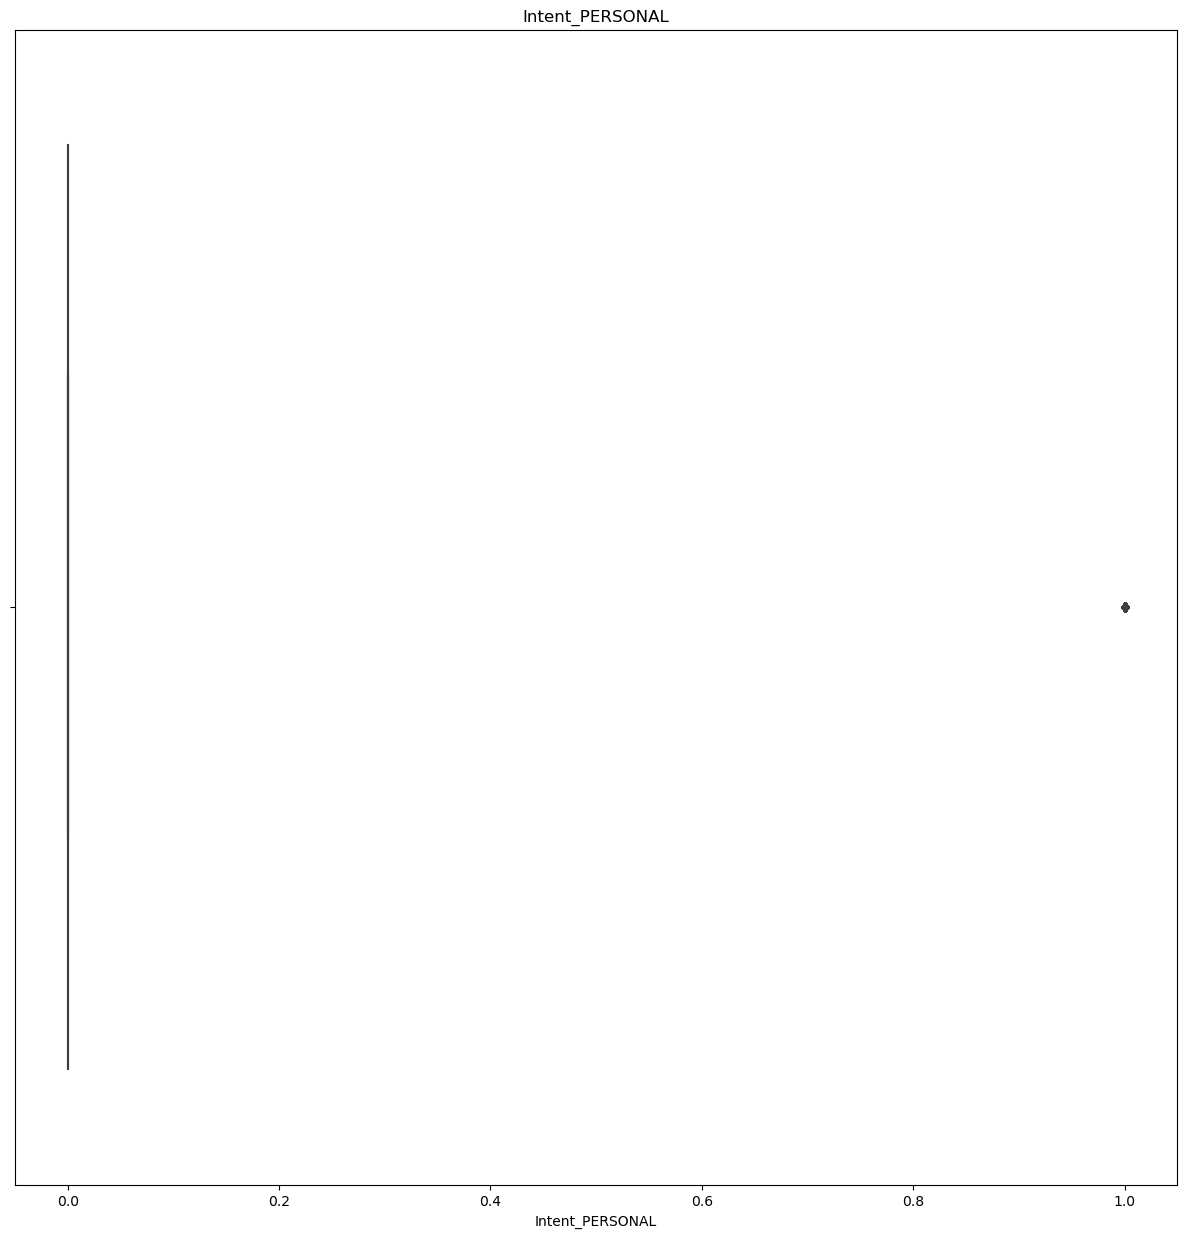

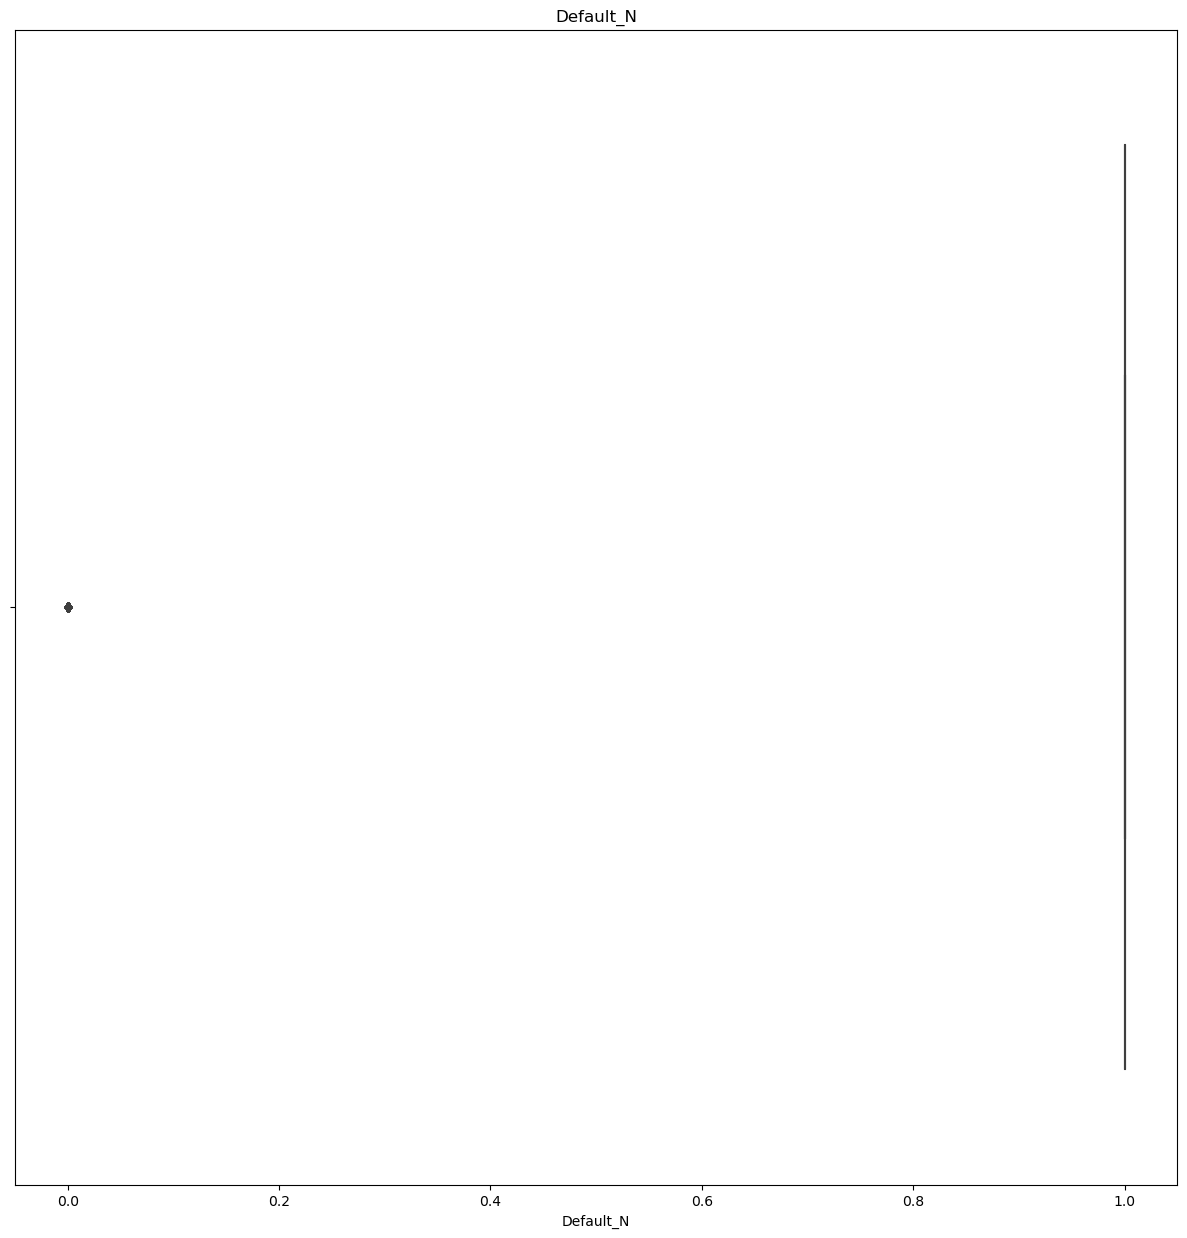

In [882]:
# check for outliers in all features (we wiil only be lokking for the continuous ones)

for feature in df1.columns:
    plt.figure(figsize=(15, 15))
    sns.boxplot(data=df1, x=feature)
    plt.title(feature)  # Make sure there's no variable named 'title' that could cause conflict
    plt.show()

In [883]:
df1.describe()

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length,Home_MORTGAGE,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Default_N
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211,0.412633,0.079310,0.504773,0.159971,0.198060,0.110647,0.186336,0.169455,0.823670
std,6.348078,6.198312e+04,4.085333,6322.086646,3.081605,0.413006,0.106782,4.055001,0.492315,0.270226,0.499985,0.366584,0.398544,0.313700,0.389383,0.375159,0.381106
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [884]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32581 entries, 0 to 32780
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       32581 non-null  int64  
 1   Income                    32581 non-null  int64  
 2   Emp_length                32581 non-null  float64
 3   Amount                    32581 non-null  int64  
 4   Rate                      32581 non-null  float64
 5   Status                    32581 non-null  int64  
 6   Percent_income            32581 non-null  float64
 7   Cred_length               32581 non-null  int64  
 8   Home_MORTGAGE             32581 non-null  uint8  
 9   Home_OWN                  32581 non-null  uint8  
 10  Home_RENT                 32581 non-null  uint8  
 11  Intent_DEBTCONSOLIDATION  32581 non-null  uint8  
 12  Intent_EDUCATION          32581 non-null  uint8  
 13  Intent_HOMEIMPROVEMENT    32581 non-null  uint8  
 14  Intent

# Data Splitting

In [885]:
x = df1.drop("Status", axis=1)

In [886]:
x

,Age,Income,Emp_length,Amount,Rate,Percent_income,Cred_length,Home_MORTGAGE,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Default_N
Id,,,,,,,,,,,,,,,,
0,22,59000,123.0,35000,16.02,0.59,3,0,0,1,0,0,0,0,1,0
1,21,9600,5.0,1000,11.14,0.10,2,0,1,0,0,1,0,0,0,1
2,25,9600,1.0,5500,12.87,0.57,3,1,0,0,0,0,0,1,0,1
3,23,65500,4.0,35000,15.23,0.53,2,0,0,1,0,0,0,1,0,1
4,24,54400,8.0,35000,14.27,0.55,4,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,30,1,0,0,0,0,0,0,1,1
32577,54,120000,4.0,17625,7.49,0.15,19,1,0,0,0,0,0,0,1,1
32578,65,76000,3.0,35000,10.99,0.46,28,0,0,1,0,0,1,0,0,1


In [887]:
# Function to replace outliers with mean
def replace_outliers_with_mean(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column = column.apply(lambda x: x if lower_bound <= x <= upper_bound else column.mean())
    return column

In [888]:
# Apply the function to all numerical columns in the DataFrame
numerical_columns = x.select_dtypes(include=['float64', 'int64']).columns
x[numerical_columns] = x[numerical_columns].apply(replace_outliers_with_mean, axis=0)

# Now, outliers in all numerical columns have been replaced with mean values

In [889]:
# scaling the x 
scaler = MinMaxScaler()
x1 = scaler.fit_transform(x)

In [890]:
# Make the dataframe
x1 = pd.DataFrame(x1, columns=x.columns)

In [891]:
x1

,Age,Income,Emp_length,Amount,Rate,Percent_income,Cred_length,Home_MORTGAGE,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Default_N
0,0.10000,0.404400,0.342120,0.403972,0.725530,0.386826,0.076923,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.05000,0.041175,0.357143,0.022222,0.391513,0.227273,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.25000,0.041175,0.071429,0.222222,0.509925,0.386826,0.076923,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.15000,0.452193,0.285714,0.403972,0.671458,0.386826,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.20000,0.370577,0.571429,0.403972,0.605749,0.386826,0.153846,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,0.38673,0.360284,0.071429,0.235556,0.529774,0.250000,0.292632,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
32577,0.38673,0.852916,0.285714,0.761111,0.141684,0.340909,0.292632,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
32578,0.38673,0.529396,0.214286,0.403972,0.381246,0.386826,0.292632,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
32579,0.38673,0.456419,0.357143,0.644444,0.414784,0.227273,0.292632,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [892]:
y = df1["Status"]
y

Id
0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32780    0
Name: Status, Length: 32581, dtype: int64

In [894]:
x_train, x_test, y_train, y_test = train_test_split(x1,y, test_size=0.2)

<Axes: xlabel='Status', ylabel='Count'>

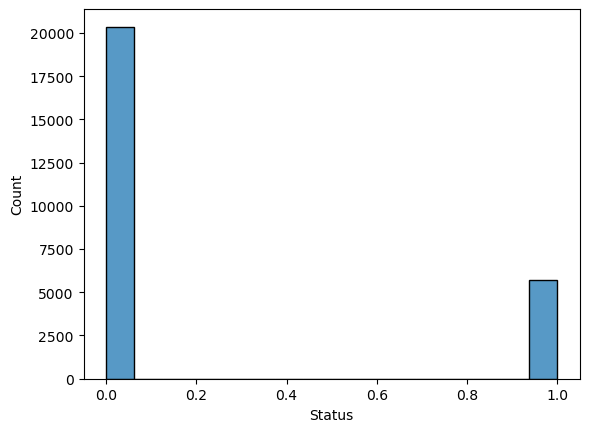

In [921]:
sns.histplot(y_train)

In [895]:
# resampling the imbalanced dataset
sm=SMOTE(random_state=0)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 20359, 1: 5705})
The number of classes after fit Counter({0: 20359, 1: 20359})


In [896]:
x_train_res

,Age,Income,Emp_length,Amount,Rate,Percent_income,Cred_length,Home_MORTGAGE,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Default_N
0,0.200000,0.332578,0.571429,0.355556,0.076660,0.386364,0.153846,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.850000,0.279404,0.142857,0.351111,0.552361,0.454545,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.850000,0.456419,1.000000,0.403972,0.039014,0.295455,0.292632,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.400000,0.411753,0.857143,0.044444,0.776865,0.068182,0.461538,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.300000,0.264698,0.214286,0.404444,0.605749,0.545455,0.153846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40713,0.424703,0.357463,0.250424,0.400264,0.382731,0.433168,0.307692,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
40714,0.476535,0.186914,0.041351,0.081874,0.378223,0.180628,0.838043,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
40715,0.283987,0.188826,0.048553,0.178329,0.481704,0.339125,0.153846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
40716,0.186524,0.149036,0.214286,0.422222,0.282247,0.942294,0.020733,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Models

In [897]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Iterate over different models
for model_name, model in models.items():
    # Train the model
    model.fit(x_train_res, y_train_res)
    
    # Make predictions on the test set
    predictions = model.predict(x_test)
    
    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Test Accuracy for {model_name}: {accuracy:.2f}")

Test Accuracy for Random Forest: 0.91
Test Accuracy for Logistic Regression: 0.76
Test Accuracy for K-Nearest Neighbors: 0.79
Test Accuracy for AdaBoost: 0.83
Test Accuracy for XGBoost: 0.93


## Random forest

In [922]:
rf = RandomForestClassifier(min_samples_split=8, min_samples_leaf=7, max_features="log2",max_depth=11)

In [923]:
rf.fit(x_train_res, y_train_res)

RandomForestClassifier(max_depth=11, max_features='log2', min_samples_leaf=7,
                       min_samples_split=8)

In [924]:
pred_train = rf.predict(x_train)

In [925]:
# got the train accuracy as 1, which is clearly the case of overfiting 
# changed the parameters of the model 

In [926]:
train_accuracy = accuracy_score(y_train, pred_train)
train_accuracy

0.9137891344383057

In [927]:
pred_test = rf.predict(x_test)

In [928]:
test_accuracy = accuracy_score(y_test, pred_test)
test_accuracy

0.8902869418444069

In [929]:
rf.feature_importances_

array([0.02347741, 0.1827267 , 0.04209589, 0.05822653, 0.2250164 ,
       0.2202194 , 0.03281503, 0.02821895, 0.0235011 , 0.07282279,
       0.01657223, 0.00554673, 0.01635122, 0.01420713, 0.00270469,
       0.0354978 ])

In [930]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5114
           1       0.76      0.71      0.74      1403

    accuracy                           0.89      6517
   macro avg       0.84      0.83      0.83      6517
weighted avg       0.89      0.89      0.89      6517



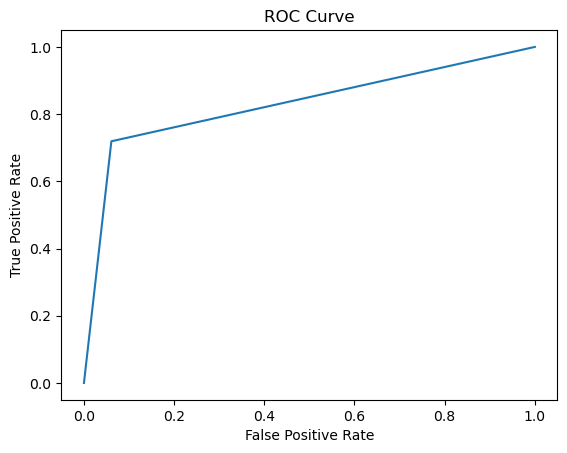

ROC AUC Score: 0.8291798735097788


In [907]:
# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, pred_test)
print("ROC AUC Score:", roc_auc)

In [908]:
# Hyperparamet tuning for random forest then used the it in the above model 

In [909]:
# randomforest_model = RandomForestClassifier()

# param_grid1 = {
#     'n_estimators': [300],
#     'min_samples_split': [7],
#     'min_samples_leaf': [1],
#     'max_features':['log2'] # total no. of  features to be considered for evry DT
# }

# random_search_rf = RandomizedSearchCV(
#     estimator=randomforest_model,
#     param_distributions=param_grid1,
#     cv=3,
#     n_iter=10,
#     scoring='accuracy',
#     random_state=42
# )

In [910]:
# random_search_rf.fit(x_train_res,y_train_res)

In [911]:
# random_search_rf.best_params_

### xgboost

In [912]:
xg = XGBClassifier()

In [913]:
xg.fit(x_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [914]:
pred_train1 = xg.predict(x_train)

In [915]:
train_accuracy1 = accuracy_score(y_train, pred_train1)
train_accuracy1

0.9489717618170657

In [916]:
pred_test1 = xg.predict(x_test)

In [917]:
test_accuracy1 = accuracy_score(y_test, pred_test1)
test_accuracy1

0.9255792542580942

In [918]:
xg.feature_importances_

array([0.0388951 , 0.05129757, 0.05789849, 0.01955277, 0.07272838,
       0.1151679 , 0.09078209, 0.03123002, 0.10414585, 0.17382096,
       0.04872897, 0.02019835, 0.05698984, 0.06705403, 0.01559551,
       0.03591418], dtype=float32)

In [919]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5114
           1       0.76      0.72      0.74      1403

    accuracy                           0.89      6517
   macro avg       0.84      0.83      0.84      6517
weighted avg       0.89      0.89      0.89      6517



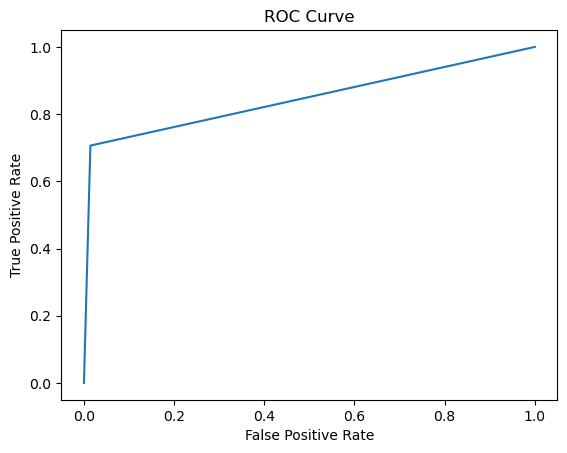

ROC AUC Score: 0.8460345045297928


In [920]:
# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_test1)

# Plot the ROC curve
plt.plot(fpr1, tpr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the ROC AUC score
roc_auc1 = roc_auc_score(y_test, pred_test1)
print("ROC AUC Score:", roc_auc1)